<a href="https://colab.research.google.com/github/micahjoseph/Logistic-Regression/blob/main/ChurnPrediction(Logistic_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression in Telcom Customer Churn data. 

## <b>What is Churn Prediction? </b> 

### Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

## <b>About Data </b>

* ### customerID : Customer ID
* ### gender : Whether the customer is a male or a female
* ### SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* ### Partner : Whether the customer has a partner or not (Yes, No)
* ### Dependents : Whether the customer has dependents or not (Yes, No)
* ### tenure : Number of months the customer has stayed with the company
* ### PhoneService : Whether the customer has a phone service or not (Yes, No)
* ### MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* ### InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* ### OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* ### OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* ### DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* ### TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* ### StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* ### StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* ### Contract : The contract term of the customer (Month-to-month, One year, Two year)
* ### PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* ### PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* ### MonthlyCharges : The amount charged to the customer monthly
* ### TotalCharges : The total amount charged to the customer
* ### Churn : Whether the customer churned or not (Yes or No)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [5]:
df=pd.read_csv("/content/drive/MyDrive/MACHINE LEARNING/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.shape


(7043, 21)

That's a lot of columns, to simplify our experiment we will only use 2 features tenure and MonthlyCharges and the target would be Churn of course. Let us do a simple EDA and visualization on our features and target.

##EDA

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


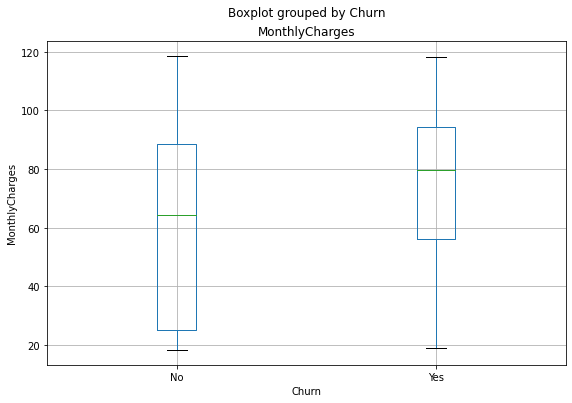

In [6]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


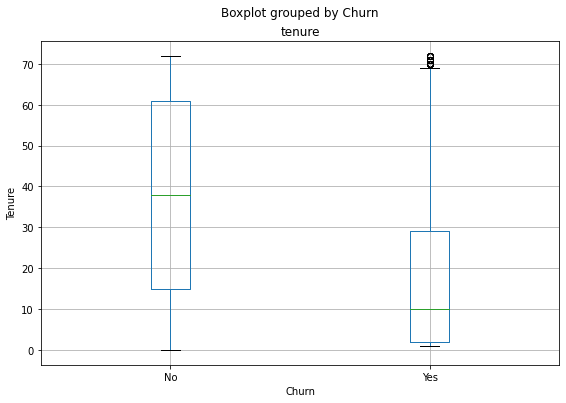

In [7]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

## <b> Insights from our simple EDA: </b>
* ### We can see a difference between our target classes on tenure as you can see in the second boxplot, which is good because our model (Logistic Regression) may use this to separate the two classes.
* ### There is also a slight difference between our target classes on monthly charges as shown in the first boxplot.

### Before we start predicting, an important step to do is to convert our **Churn** feature, which is a string, into integer. *Yes* will be converted to 1 and *No* will be converted to 0. We will name this new columns a "class".

In [15]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
# features will be saved as X and our target will be saved as y
X = df[['tenure','MonthlyCharges']].copy()
y = df['class'].copy()

In [16]:
df.shape

(7043, 22)

## <b> Splitting data into train and test

In [11]:
from sklearn.model_selection import train_test_split 


In [18]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [19]:
y_train.value_counts()

0    4133
1    1501
Name: class, dtype: int64

In [20]:
y_test.value_counts()

0    1041
1     368
Name: class, dtype: int64

## <b>Fitting logistic regression on train data

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [22]:
clf.coef_

array([[-0.05646728,  0.03315385]])

In [23]:
# Get the model coefficients
clf.coef_

array([[-0.05646728,  0.03315385]])

In [24]:
clf.intercept_

array([-1.77408975])

## <b>Evaluating the performance of the trained model

In [25]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [26]:
X_test

,tenure,MonthlyCharges
2200,19,58.20
4627,60,116.60
3225,13,71.95
2828,1,20.45
3768,55,77.75
...,...,...
2631,7,99.25
5333,13,88.35
6972,56,111.95
4598,18,56.25


In [27]:
test_preds

array([[0.7145149 , 0.2854851 ],
       [0.78522641, 0.21477359],
       [0.53064776, 0.46935224],
       ...,
       [0.77288679, 0.22711321],
       [0.71618111, 0.28381889],
       [0.57740038, 0.42259962]])

In [28]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [29]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [30]:
train_class_preds

array([0, 0, 0, ..., 0, 1, 0])